In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from numpy import sqrt, abs, ceil

In [199]:
G = 6.67*10**(-11)      #Грав постоянная
M = 5.974 * 10**(24)  #масса Земли
m = 1                   #масса тела
ALPHA = 3              
R0 = 6371 * 10 **3


In [207]:
def f_right(u_vec):
  
  r = sqrt(u_vec[0]**2 + u_vec[1]**2)
  new_x = (-G  * M)  * (u_vec[0]/r**ALPHA)
  new_y = -G  * M  * (u_vec[1]/r**ALPHA)
  return np.array((new_x, new_y))

def f_give(u_vec): return u_vec

def fun_x(u_vec):
    r = sqrt(u_vec[0]**2 + u_vec[1]**2)
    return -G  * M  * (u_vec[0]/r**ALPHA)

def fun_y(u_vec):
    r = sqrt(u_vec[0]**2 + u_vec[1]**2)
    return -G  * M * (u_vec[1]/r**ALPHA)


def K1(u_vec, fun):
    return fun(u_vec)

def K2(u_vec, h, K1, fun):
    return fun(u_vec + 0.1*h * K1)

def K3(u_vec, h, K1, K2, fun):
    return fun(u_vec - 0.053*h*K1 + 0.353*h*K2)


def give_x(u_vec):
    return u_vec[0]

def give_y(u_vec):
    return u_vec[1]


def Euler(h, f, u_vec, proj, norm_k=1):
  
  res = proj + h * f(u_vec) * norm_k
  return res

def RK(h, fun, u_vec, proj, norm_k=1):
    K1ex = K1(u_vec, fun) * norm_k
    K2ex = K2(u_vec, h, K1ex, fun) * norm_k
    K3ex = K3( u_vec, h, K1ex, K2ex, fun) * norm_k
    res = proj + (h/3)*(49/3*K1ex - 55/2 * K2ex + 85/6* K3ex) 
    return res


def rynge(h, y0, fun, cycle_fun, a, b, eps, p):
    arr_h = np.array(cycle_fun(h, y0,  a, b, fun))
    arr_h2 = np.array(cycle_fun(h/2, y0, a, b, fun))
    arr_h2 = arr_h2[::2]
    difference = abs(arr_h - arr_h2)/(2**p - 1)
    while max(difference) > eps:
        h /= 2
        arr_h = np.array(cycle_fun(h, y0, a, b, fun))
        arr_h2 = np.array(cycle_fun(h/2, y0, a, b, fun))
        arr_h2 = arr_h2[::2]
        difference  = abs(arr_h - arr_h2)/(2**p - 1)
    return (arr_h, h)


In [208]:
def solve_RK(h, a, b, velocity, R):
    
    n = int(ceil(abs(b - a)/h))
   
    r = np.zeros((n, 2))           # coordinates  # velocities
    r[0, 0] = R  #x
    r[0, 1] = 0   #y
    
    v = np.zeros((n, 2))          # velocities
    v[0, 0] = 0   #x
    v[0, 1] = velocity   #y

    # normalization

    T0 = R / velocity
    r[0, 0] = 1
    v[0, 1] = 1
    h = h / T0

    norm_k = 1 / (R * velocity ** 2)

    revolutions = 0 # laps counter

    r_dots = []
    for i in range(1, n):
        
        v[i] = RK(h, f_right, r[i-1], v[i-1], norm_k)
        r[i] = RK(h, f_give, v[i], r[i-1])

        # count revolutions
        
        if v[i, 1] > 0 and (v[i-1, 0] > 0 and v[i, 0] <= 0):
          
          # revolution
          revolutions += 1
          r_dots.append([r[i,0]* R, r[i, 1]* R])
          
        
        if sqrt(r[i, 0] ** 2 + r[i, 1] ** 2) < R0 / R:
          print('Falling')
          return r[:i+1] * R, v[:i+1]* velocity, revolutions, np.array(r_dots)
        
        if sqrt(r[i, 0] ** 2 + r[i, 1] ** 2) > 100*R0 / R:
          print('Flown away...')
          return r[:i-1] * R, v[:i-1]* velocity, revolutions, np.array(r_dots)
    
    return r * R, v * velocity, revolutions, np.array(r_dots)

def solve_Euler(h, a, b, velocity, R):
    n = int(ceil(abs(b - a)/h))
    r = np.zeros((n, 2))           # coordinates  # velocities
    r[0, 0] = R  #x
    r[0, 1] = 0   #y
    v = np.zeros((n, 2))          # velocities
    v[0, 0] = 0   #x
    v[0, 1] = velocity   #y

    # normalization

    T0 = R / velocity
    r[0, 0] = 1
    v[0, 1] = 1
    h = h / T0

    norm_k = 1 / (R * velocity ** 2)

    revolutions = 0 # laps counter

    r_dots = []
    for i in range(1, n):
        
        v[i] = Euler(h, f_right, r[i-1], v[i-1], norm_k)
        
        r[i] = Euler(h, f_give, v[i], r[i-1])
        #print(r[i])
        
        # count revolutions
        if v[i, 1] > 0 and (v[i-1, 0] > 0 and v[i, 0] <= 0):
          # revolution
          revolutions += 1
          r_dots.append([r[i,0]* R, r[i, 1]* R])
        if sqrt(r[i, 0] ** 2 + r[i, 1] ** 2) < R0 / R:
          print('Falling')
          return r[:i+1] * R, v[:i+1]* velocity, revolutions, np.array(r_dots)
        if sqrt(r[i, 0] ** 2 + r[i, 1] ** 2) > 100*R0 / R:
          print('Flown away...')
          return r[:i-1] * R, v[:i-1]* velocity, revolutions, np.array(r_dots)
    
    return r * R, v * velocity, revolutions, np.array(r_dots)
          
        
        

    

In [209]:
a = 0
b = 800000
dt = 30
v0 = 2000
R = 4.716 * R0

rs,vs, revols, r_dots = solve_RK(dt, a, b, v0, R)

Flown away...


94391.14933003302

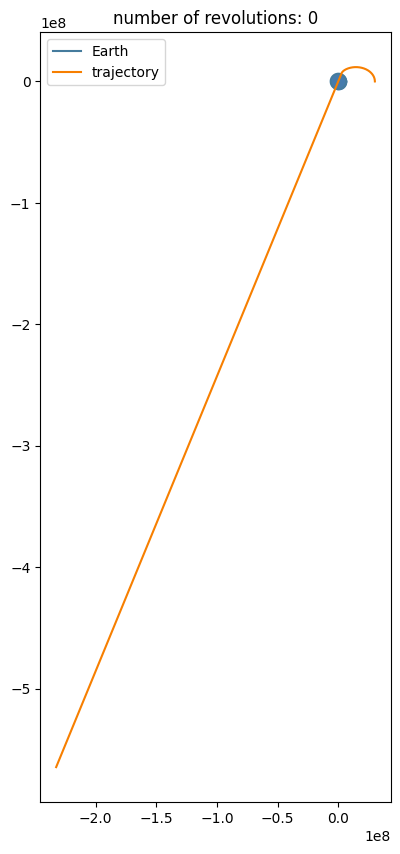

In [210]:
#draw Earth
t = np.arange(0, 2*np.pi, 0.01)
x_earth = np.array(R0*np.cos(t))
y_earth = np.array(R0*np.sin(t))

# plt.style.use("dark_background")
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(x_earth, y_earth, label='Earth', c='#457B9D')
ax.fill_between(x_earth, y_earth, color='#457BAD', alpha=1)
ax.plot(rs[:,0], rs[:,1], label='trajectory', c='#F77F00')
ax.set(aspect=1)
ax.set_title(f'number of revolutions: {revols}')

if r_dots.size > 0: 
  ax.scatter(r_dots[:, 0],r_dots[:,1], label='lap endpoints')
  # ax.scatter(rs[-1:, 0],r_dots[-1:,1], label='endpoint')

ax.legend()
T_period = 2 * np.pi * R / v0
T_period


In [10]:
# draw multiple portraits with different parameters

a = 0
b = 80000
dt = 30
v0 = 3690
R = 2 * R0

#draw Earth
t = np.arange(0, 2*np.pi, 0.01)
x_earth = np.array(R0*np.cos(t))
y_earth = np.array(R0*np.sin(t))

# fig, axs = plt.subplots(10, 10, figsize=(20, 20))

# R_curr = R
# for i in range(10):
#   v0_curr = v0
  
#   for j in range(10):
    
#     rs,vs, revols, r_dots = solve_RK(dt, a, b, v0_curr, R_curr)
    
#     axs[i][j].plot(x_earth, y_earth, label='Earth', c='#457B9D')
#     axs[i][j].fill_between(x_earth, y_earth, color='#457BAD', alpha=.85)
    
#     axs[i][j].plot(rs[:,0], rs[:,1],  'k', label='trajectory', c='#F77F00')
#     axs[i][j].set(aspect=1)
#     axs[i][j].set_title(f'revolutions: {revols}')
#     axs[i][j].set_ylim(-5*R0, 5*R0)
#     axs[i][j].set_xlim(-5*R0, 5*R0)
#     #axs[i][j].legend();

#     # update initial velocity parameter
#     v0_curr += 0.18*v0

#   # update initial distance parameter
#   R_curr *= 1.1

# plt.tight_layout(w_pad=2.5)

In [11]:
T_period = 2 * np.pi * R / v0
T_period

21696.571052596824

In [12]:
R0 * 4.716 / 3690

8142.4487804878045

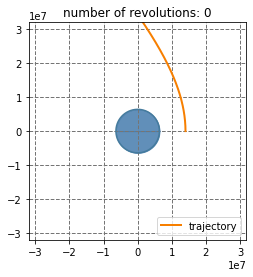

In [13]:
def data_gen():

    i = 0

    for t in range(rs.shape[0]):
        i += 1
        #if sqrt(rs[i, 0] ** 2 + rs[i, 1] ** 2) < R0:
        #   print('Falling')
        #   yield (rs[i, 0], rs[i, 1])
        # if sqrt(rs[i, 0] ** 2 + rs[i, 1] ** 2) > 100*R0:
        #   print('Flown away...')
        #   yield (rs[i, 0], rs[i, 1])
        # #print(f'gen {i}')
        yield (rs[t, 0], rs[t, 1])


def init():
    ax.set_ylim(-3.5*R0, 3.5*R0)
    ax.set_xlim(-3.5*R0, 3.5*R0)
    xdata = np.array([])
    ydata = np.array([])
    line.set_data(xdata, ydata)
    return line,

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2, c='#F77F00',label='trajectory')
ax.grid(linestyle='--', linewidth=1, color='#757575')
ax.set_ylim(-5*R0, 5*R0)
ax.set_xlim(-5*R0, 5*R0)
ax.set(aspect=1)
ax.set_title(f'number of revolutions: {revols}')
ax.legend(loc='lower right');

xdata = np.array([rs[0,0]])
ydata = np.array([rs[0,1]])

d = np.arange(0, 2*np.pi, 0.01)
x_earth = np.array(R0*np.cos(d))
y_earth = np.array(R0*np.sin(d))
#
ax.plot(x_earth, y_earth, label='Earth', c='#457B9D')
ax.fill_between(x_earth, y_earth, color='#457BAD', alpha=.85)


def run(data):
    global xdata, ydata
    # update the data
    x, y = data
    xdata = np.concatenate((xdata,[x]))
    ydata = np.concatenate((ydata,[y]))
    xmin, xmax = ax.get_xlim()

    # if x >= xmax:
    #     ax.set_xlim(xmin, 2*xmax)
    #     ax.figure.canvas.draw()
    
    
    line.set_data(xdata, ydata)
    

    return line,


ani = animation.FuncAnimation(fig, run, data_gen,interval=5, save_count=rs.shape[0] )
writergif = animation.PillowWriter(fps=30)
ani.save('eartr.gif', writer=writergif)

*Реализуйте процедуру численного анализа полученного решения с целью выяснения его периодичности, определите период вращения спутника, оцените точность определения периода.*  
Оценить можно также степень близости траектории к окружности

Конечная точка - точка траектории, *в которой заканчивается периодическая часть квазипериодической траектории* или в которой вектор скорости тела совпадает с начальным вектором скорости.  
Для круговой траектории тело возвращается в одну и ту же точку после полного оборота по окружности, для незамкнутой траектории из-за сдвига конечная точка также сдвигается на некоторое расстояние

Подсчет разброса конечных точек траектории 

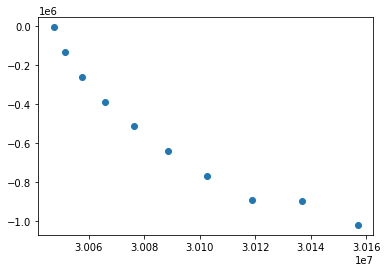

In [47]:
plt.scatter(r_dots[:, 0],r_dots[:,1], label='endpoints')

In [48]:

m = r_dots.mean(axis=0)
start_point = np.array([R, 0])
print(m)
rng = np.abs(r_dots - r_dots.mean(axis=0)).max(axis=0)
rng_var = np.sqrt(rng[0] **2 + rng[1] ** 2)
print(rng)
print(rng_var)

[30090294.53999182  -551451.53410979]
[ 66808.41339807 544358.79670923]
548443.1270929491


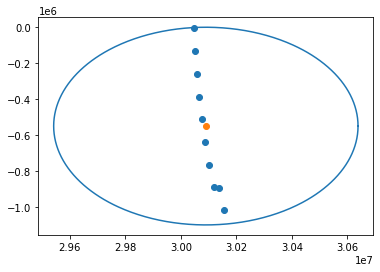

In [49]:
t = np.arange(0, 2*np.pi, 0.01)
plt.scatter(r_dots[:, 0],r_dots[:,1], label='endpoints')
plt.scatter(m[0], m[1], label='endpoints');

plt.plot(rng_var*np.cos(t)+ m[0], rng_var*np.sin(t) + m[1])

In [50]:
rng_var / R

0.018253670086828887

In [51]:
(R/v0)/(np.pi)

2390.9557438699007

Степень близости к окружности:  
Провести окружность с радиусом начального вектора  
посчитать разность расстояний между точками окружности и траектории

In [174]:
def solve_RK_2(h, a, b, velocity, R):
    
    n = int(ceil(abs(b - a)/h))
   
    r = np.zeros((n, 2))           # coordinates  # velocities
    r[0, 0] = R  #x
    r[0, 1] = 0   #y
    
    v = np.zeros((n, 2))          # velocities
    v[0, 0] = 0   #x
    v[0, 1] = velocity   #y

    # normalization

    T0 = R / velocity
    r[0, 0] = 1
    v[0, 1] = 1
    h = h / T0

    norm_k = 1 / (R * velocity ** 2)

    revolutions = 0 # laps counter

    r_dots = []     # endpoints coordinates
    i_dots = []     # endpoints time 
    for i in range(1, n):
        
        v[i] = RK(h, f_right, r[i-1], v[i-1], norm_k)
        r[i] = RK(h, f_give, v[i], r[i-1])

        # count revolutions
        
        if v[i, 1] > 0 and (v[i-1, 0] > 0 and v[i, 0] <= 0):
          
          # revolution
          revolutions += 1
          r_dots.append([r[i,0]* R, r[i, 1]* R])
          i_dots.append(i)                                  # get 
        
        if sqrt(r[i, 0] ** 2 + r[i, 1] ** 2) < R0 / R:
          print('Falling')
          return r[:i+1] * R, v[:i+1]* velocity, revolutions, np.array(r_dots)
        
        if sqrt(r[i, 0] ** 2 + r[i, 1] ** 2) > 100*R0 / R:
          print('Flown away...')
          return r[:i-1] * R, v[:i-1]* velocity, revolutions, np.array(r_dots)
    
    return r * R, v * velocity, revolutions, np.array(r_dots), np.array(i_dots)

In [176]:
a = 0
b = 72000
dt = 30
v0 = 3770
R = 4.416 * R0

rs,vs, revols, r_dots, i_dots = solve_RK_2(dt, a, b, v0, R)

C:\Users\kamil\AppData\Local\Temp\ipykernel_16900\258923630.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(rs[:i_dots[0],0], rs[:i_dots[0],1],  'k', label='trajectory', c='#F77F00')


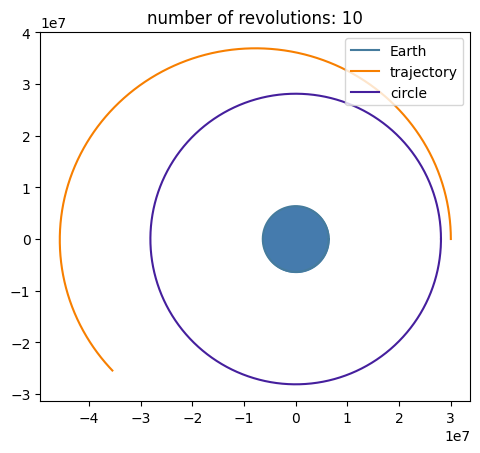

In [164]:
#draw Earth
n_points = rs.shape[0]
t = np.linspace(0, 2*np.pi, i_dots[0])
x_earth = np.array(R0*np.cos(t))
y_earth = np.array(R0*np.sin(t))

x_circle = np.array(R*np.cos(t))
 
y_circle = np.array(R*np.sin(t))

plt.style.use("default")
fig, ax = plt.subplots()
ax.plot(x_earth, y_earth, label='Earth', c='#457B9D')
ax.fill_between(x_earth, y_earth, color='#457BAD', alpha=1)

ax.plot(rs[:i_dots[0],0], rs[:i_dots[0],1],  'k', label='trajectory', c='#F77F00')

ax.plot(x_circle, y_circle, label='circle', c='#451F9D')

ax.set(aspect=1)
ax.set_title(f'number of revolutions: {revols}')


ax.legend();


In [165]:
dists = (x_circle - rs[:i_dots[0],0])**2 +  (y_circle - rs[:i_dots[0],1])**2  # dist between traj and circle points
d = np.max(np.sqrt(dists))
sim_koef = 1 - d / R
sim_koef    # coefficent shows similarity to circle of curve 

-1.436044947314767

In [182]:
def find_opt_speed(v0):
    a = 0
    b = 72000
    dt = 30
    R = 4.416 * R0
    

    while True:
        rs,vs, revols, r_dots, i_dots = solve_RK_2(dt, a, b, v0, R)

        n_points = rs.shape[0]
        t = np.linspace(0, 2*np.pi, i_dots[0])
        x_earth = np.array(R0*np.cos(t))
        y_earth = np.array(R0*np.sin(t))

        x_circle = np.array(R*np.cos(t))
        
        y_circle = np.array(R*np.sin(t))

    
        
        dists = (x_circle - rs[:i_dots[0],0])**2 + (y_circle - rs[:i_dots[0],1])**2  # dist between traj and circle points
        d = np.max(np.sqrt(dists))
        sim_koef = 1 - d / R
        if sim_koef < 0.95:
            v0 += 10
        elif v0 > 4000:
            print('Скорость превышена')
            break
        else:
            print(f'Коэффициент близости:{sim_koef}\nНачальная скорость: {v0}')
            T_period = 2 * np.pi * R / v0
            print(f'Период T = {T_period}')
            break
    

find_opt_speed(3000)

Коэффициент близости:0.9514026472973189
Начальная скорость: 3730
Период T = 47392.29130896883


46889.4553269108

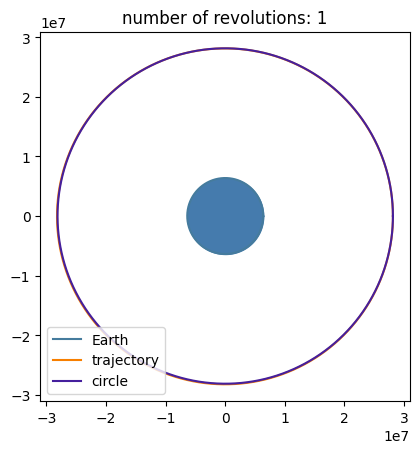

In [179]:

plt.style.use("default")
fig, ax = plt.subplots()
ax.plot(x_earth, y_earth, label='Earth', c='#457B9D')
ax.fill_between(x_earth, y_earth, color='#457BAD', alpha=1)

ax.plot(rs[:i_dots[0],0], rs[:i_dots[0],1], label='trajectory', c='#F77F00')

ax.plot(x_circle, y_circle, label='circle', c='#451F9D')

ax.set(aspect=1)
ax.set_title(f'number of revolutions: {revols}')


ax.legend(loc='lower left')
